Introduction to my Doge coin Linear model based on Simple Linear Regression to predicit price of Memecoin which currenctly Trending accross globe due to its exponantial Growth over 3 month time period, We imported our dataset from Crypto Exchange(CoinDCX) and we are using only 3 month data of High and Low of 24H time.

Importing Required libraries which will help us to achieve end goals.

In [80]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns


We used Pandas module to read CSV file and Created dataset variable to store data which we got from CSV file and access it quickly for Linear model.

In [81]:
dataset = pd.read_csv('Dogecoin_Data.csv')
dataset

,24h High (USD),24h Low (USD)
0,0.056991,0.054280
1,0.057048,0.054240
2,0.060611,0.054703
3,0.063291,0.058582
4,0.059712,0.055022
...,...,...
87,0.377346,0.367013
88,0.380158,0.330394
89,0.342092,0.295684
90,0.354765,0.312722


# New Section

We used Describe function to get Summary Statistics for our chosen dataset so we can get to know more about our dataset.

In [82]:
dataset.describe()

,24h High (USD),24h Low (USD)
count,92.000000,92.000000
mean,0.287538,0.230550
std,0.201541,0.156179
min,0.052467,0.049387
25%,0.062004,0.057089
50%,0.334971,0.254808
75%,0.415447,0.332182
max,0.740010,0.601952


From Pandas module we have Imported DataFrame and Created here two Varibale X and Y and Store values from both coloums seperatly of our dataset and also to access quickly data.

In [83]:
X = DataFrame(dataset, columns = ['24h High (USD)'])
Y = DataFrame(dataset, columns = ['24h Low (USD)'])

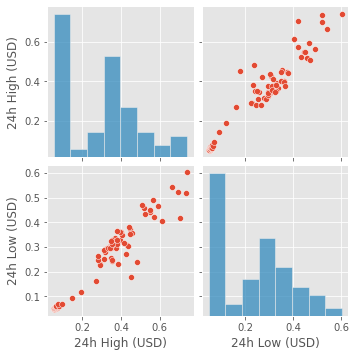

In [84]:
########## Using Pairplot to plot pairwise relationships in a dataset

sns.pairplot(dataset)

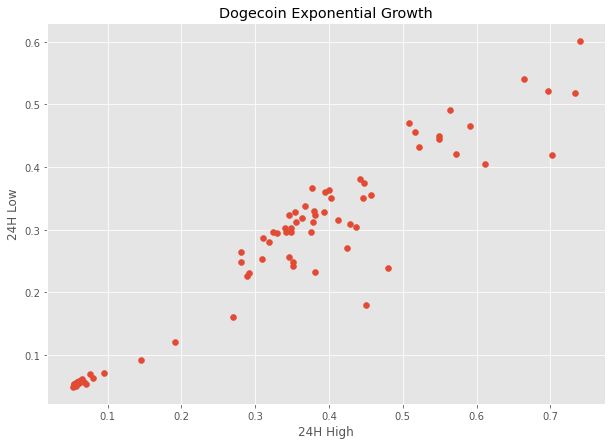

In [85]:
######### Using Matplotlib to scatter datapoints and plot its distribution


plt.figure(figsize=(10,7))
plt.scatter(X,Y)
plt.xlabel('24H High')
plt.ylabel('24H Low')
plt.title("Dogecoin Exponential Growth")


plt.show()

Inserting data into linear model to calculate Regression with Help of sklearn library which vary helpful to handle data.

In [86]:
##########3 Created regr variable to access LinearRegression across our model

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, Y)

LinearRegression()

<AxesSubplot:ylabel='Count'>

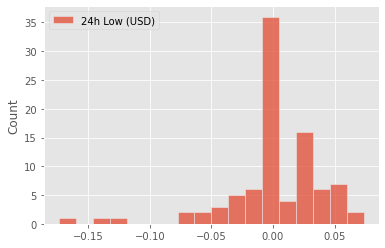

In [87]:
########### Ploting histograms to show distributions of datasets

sns.histplot((Y - regr.predict(X)))


In [88]:
########## finding coefficient with Sklearn 

pd.DataFrame(regr.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
24h High (USD),0.750286


In [89]:
########## estimating r square with sklearn

pd.DataFrame(regr.score(X,Y), X.columns, columns=['Regression Score'])

,Regression Score
24h High (USD),0.937421


In [90]:
############ finding Intercept with sklearn

pd.DataFrame(regr.intercept_ , X.columns, columns=['Intercept'])

,Intercept
24h High (USD),0.014814


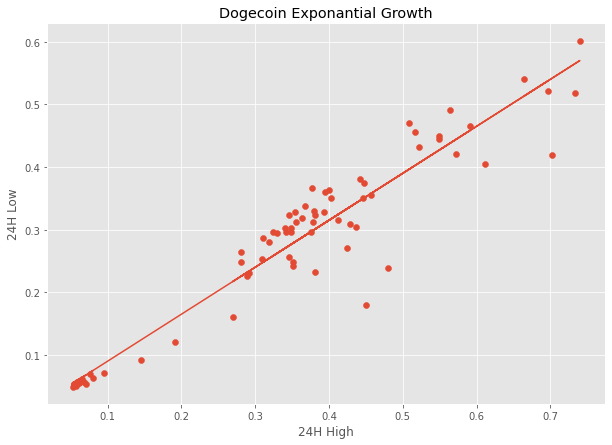

In [91]:
####### Plotting regression line and scattering datapoints with matplotlib


plt.figure(figsize = (10,7))
plt.scatter(X, Y) 
plt.plot(X, regr.predict(X))
plt.xlabel('24H High')
plt.ylabel('24H Low')
plt.title('Dogecoin Exponantial Growth')

plt.show()

Using Statsmodel api libary to get complete statistical insights and than we used The summary() method to obtain a table which gives an extensive description about the regression results of our chosen dataset.

In [92]:
import statsmodels.api as sm

mod = sm.OLS(X, Y) #Load data

res = mod.fit() #Fit regression model

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:         24h High (USD)   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              4355.
Date:                Sun, 20 Jun 2021   Prob (F-statistic):                    1.20e-78
Time:                        20:32:40   Log-Likelihood:                          144.80
No. Observations:                  92   AIC:                                     -287.6
Df Residuals:                      91   BIC:                                     -285.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [93]:
import sklearn.metrics as metrics


print('MAE: {}'.format(metrics.mean_absolute_error(Y, regr.predict(X)))) #Mean absolute error
print('MSE: {}'.format(metrics.mean_squared_error(Y, regr.predict(X)))) #Mean Squared Error
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y, regr.predict(X))))) #Root Mean Squared Error

MAE: 0.02548145003235742
MSE: 0.0015098262001597563
RMSE: 0.038856482086773586


Conclusion:
    
Regression score we predicted for our model tell us about total 93% of variation of price of Dogecoin in 3 months.
    
Coeffecient we predicted is 0.750286 gives us the direction of effect which is positive so we can interpret the price for dependent variable has increased by coeffecient of independent variable.
    
The intercept of the regression line is just the predicted value for y, when x is 0 where we predict our Intercept is 0.014814.

The average set of errors(MSE) for our model we predicted is 0.0015098.

The conctrated data around the best fit line(RMSE) in our model we predicted is 0.03885.

The Mean absolute error we measure is 0.02548 tell us about average magnitude of the errors in a set of forecasts, without considering their direction and the accuracy of continuos variable.

Reference:

https://realpython.com/linear-regression-in-python/?fbclid=IwAR3lp5RMNNHUexG-9luz_XEQ2XDlZNGKu9-zsbm9fKYDFyfzfO3O0rHgYok

https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2